In [1]:
# Install dependencies
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

In [2]:
# Import necessary libraries
import ultralytics
from ultralytics import YOLO
from roboflow import Roboflow
import os
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Check if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [4]:
# Download dataset from Roboflow
rf = Roboflow(api_key="Npr82rgYiQ5A5trJBlb8")
project = rf.workspace("capstone2025-mifho").project("military-base-object-detection")
version = project.version(12)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Military-Base-Object-Detection-12 in yolov8:: 100%|██████████| 25422/25422 [00:08<00:00, 3028.21it/s]


In [5]:
# Get dataset directory
dataset_path = dataset.location

In [6]:
# Define YOLOv8 model (pretrained on COCO, transfer learning to your dataset)
model = YOLO("yolov8n.pt").to(device)  # Move model to GPU if available

100%|██████████| 6.25M/6.25M [00:00<00:00, 310MB/s]


In [7]:
# Adjust batch size for CPU if necessary
batch_size = 8 if device == 'cuda' else 2  # Reduce batch size for CPU

In [8]:
from tqdm import tqdm  # Import tqdm for progress bar
# Train the model and log losses
results = model.train(
    data=os.path.join(dataset_path, "data.yaml"),  # Path to dataset config
    epochs=40,  # Number of training epochs
    batch=batch_size,  # Adjusted batch size
    imgsz=640,  # Image size
    device=device,  # Use GPU if available
    verbose=False  # Suppress default output
)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Military-Base-Object-Detection-12/data.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 76.2MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 356MB/s]


AMP: checks passed ✅


train: Scanning /content/Military-Base-Object-Detection-12/train/labels... 9752 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9752/9752 [00:04<00:00, 2263.26it/s]


train: New cache created: /content/Military-Base-Object-Detection-12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Military-Base-Object-Detection-12/valid/labels... 2799 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2799/2799 [00:01<00:00, 1719.09it/s]


val: New cache created: /content/Military-Base-Object-Detection-12/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      1.51G      1.543      2.914      1.478         51        640: 100%|██████████| 1219/1219 [03:58<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:38<00:00,  4.57it/s]


                   all       2799       7114      0.477      0.294      0.303        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      1.56G      1.526      2.211      1.465         14        640: 100%|██████████| 1219/1219 [03:52<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:36<00:00,  4.82it/s]


                   all       2799       7114      0.581      0.294      0.335      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      1.57G      1.518      2.024       1.47         28        640: 100%|██████████| 1219/1219 [03:48<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.92it/s]


                   all       2799       7114      0.683      0.308      0.357      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      1.58G        1.5      1.901      1.451         35        640: 100%|██████████| 1219/1219 [03:50<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:36<00:00,  4.79it/s]


                   all       2799       7114      0.659      0.322      0.376      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40       1.6G      1.466      1.772       1.43         31        640: 100%|██████████| 1219/1219 [03:52<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.96it/s]


                   all       2799       7114      0.598      0.344      0.375      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      1.62G      1.437      1.684      1.412         48        640: 100%|██████████| 1219/1219 [03:49<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:36<00:00,  4.82it/s]


                   all       2799       7114      0.514       0.32      0.379      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      1.63G      1.419      1.633      1.394         30        640: 100%|██████████| 1219/1219 [03:53<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.88it/s]


                   all       2799       7114      0.503      0.401      0.417      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      1.65G      1.398      1.565      1.379         30        640: 100%|██████████| 1219/1219 [03:52<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.97it/s]


                   all       2799       7114       0.78      0.305      0.412      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      1.67G      1.379      1.528      1.365         91        640: 100%|██████████| 1219/1219 [03:49<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.90it/s]


                   all       2799       7114      0.641      0.337      0.403       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      1.69G      1.352      1.473      1.352         29        640: 100%|██████████| 1219/1219 [03:43<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.95it/s]


                   all       2799       7114      0.584      0.359      0.402      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40       1.7G      1.336      1.426       1.34         56        640: 100%|██████████| 1219/1219 [03:45<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.90it/s]


                   all       2799       7114      0.531      0.354      0.384      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      1.72G      1.328      1.401      1.335         18        640: 100%|██████████| 1219/1219 [03:47<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.00it/s]


                   all       2799       7114        0.5      0.365      0.407      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      1.74G      1.313      1.365      1.319         37        640: 100%|██████████| 1219/1219 [03:44<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.96it/s]


                   all       2799       7114      0.572      0.372      0.417      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      1.75G        1.3      1.337      1.311         30        640: 100%|██████████| 1219/1219 [03:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.04it/s]


                   all       2799       7114      0.541      0.354      0.421      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      1.77G      1.286      1.319      1.305         47        640: 100%|██████████| 1219/1219 [03:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  5.00it/s]


                   all       2799       7114      0.387      0.448      0.428      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      1.79G      1.275      1.308      1.301         49        640: 100%|██████████| 1219/1219 [03:40<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.06it/s]


                   all       2799       7114      0.553      0.395      0.447      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40       1.8G      1.268      1.267      1.293         34        640: 100%|██████████| 1219/1219 [03:41<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.09it/s]


                   all       2799       7114      0.445      0.415      0.434      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      1.82G       1.26       1.24      1.286         40        640: 100%|██████████| 1219/1219 [03:44<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.98it/s]


                   all       2799       7114      0.586      0.375      0.445      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      1.84G       1.25      1.229       1.28         36        640: 100%|██████████| 1219/1219 [03:42<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.91it/s]


                   all       2799       7114       0.48      0.415      0.433      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      1.86G      1.245      1.208      1.274         45        640: 100%|██████████| 1219/1219 [03:43<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.09it/s]


                   all       2799       7114       0.47      0.452       0.45      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      1.87G      1.225      1.184      1.264         33        640: 100%|██████████| 1219/1219 [03:42<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.04it/s]


                   all       2799       7114      0.472      0.461      0.455       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      1.89G      1.209      1.163      1.254         41        640: 100%|██████████| 1219/1219 [03:42<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:33<00:00,  5.18it/s]


                   all       2799       7114      0.544       0.43      0.452       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40       1.9G      1.204      1.135      1.245         46        640: 100%|██████████| 1219/1219 [03:44<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.08it/s]


                   all       2799       7114      0.427      0.452      0.435       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      1.92G      1.202      1.125      1.246         35        640: 100%|██████████| 1219/1219 [03:42<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.00it/s]


                   all       2799       7114      0.453      0.452      0.457      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      1.94G      1.194      1.107      1.238         43        640: 100%|██████████| 1219/1219 [03:43<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.04it/s]


                   all       2799       7114      0.449      0.448      0.453      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      1.96G      1.189      1.092      1.236         54        640: 100%|██████████| 1219/1219 [03:41<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.05it/s]


                   all       2799       7114      0.489      0.439      0.459       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      1.97G      1.185      1.088      1.229         67        640: 100%|██████████| 1219/1219 [03:45<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.99it/s]


                   all       2799       7114      0.443      0.463       0.46      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      1.99G      1.175      1.063      1.221         35        640: 100%|██████████| 1219/1219 [03:42<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.02it/s]


                   all       2799       7114      0.486      0.447      0.463      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      2.14G      1.164      1.059       1.22         44        640: 100%|██████████| 1219/1219 [03:44<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.95it/s]


                   all       2799       7114      0.441      0.468      0.444      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      2.16G      1.145      1.029      1.209         28        640: 100%|██████████| 1219/1219 [03:42<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.99it/s]


                   all       2799       7114      0.444      0.453       0.46      0.275
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.18G      1.089     0.8834      1.194         28        640: 100%|██████████| 1219/1219 [03:33<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.03it/s]


                   all       2799       7114      0.485       0.47      0.466      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40       2.2G      1.081     0.8576      1.185         18        640: 100%|██████████| 1219/1219 [03:36<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.01it/s]


                   all       2799       7114      0.507      0.455      0.462      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.21G       1.07      0.838      1.182         46        640: 100%|██████████| 1219/1219 [03:36<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.88it/s]


                   all       2799       7114      0.496      0.446      0.466      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.23G       1.05     0.8161       1.17         43        640: 100%|██████████| 1219/1219 [03:33<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.12it/s]


                   all       2799       7114      0.504      0.467      0.467      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.25G      1.045      0.804      1.161         18        640: 100%|██████████| 1219/1219 [03:34<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:34<00:00,  5.02it/s]


                   all       2799       7114      0.511      0.455      0.476      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.26G      1.035     0.7865      1.157         20        640: 100%|██████████| 1219/1219 [03:35<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 175/175 [00:35<00:00,  4.90it/s]


                   all       2799       7114      0.491      0.462      0.469      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.28G      1.033     0.7813      1.152         37        640:  10%|█         | 124/1219 [00:22<03:18,  5.51it/s]


KeyboardInterrupt: 

In [22]:
model.model.nc = 14
model.save("yolov8_fixed.pt")


In [ ]:
!grep -r "22 " /content/datasets/coco/labels/


Streaming output truncated to the last 5000 lines.
/content/datasets/coco/labels/val2017/000000011760.txt:22 0.82075 0.206753 0.841641 0.251694 0.884922 0.233718 0.892375 0.294376 0.911781 0.343812 0.946109 0.467412 0.943125 0.539318 0.884922 0.644941 0.875969 0.761788 0.871484 0.835953 0.878953 0.932588 0.855078 0.964047 0.844625 0.932588 0.825234 0.910118 0.819266 0.941576 0.775984 0.984259 0.759563 0.959553 0.768516 0.910118 0.775984 0.808988 0.765531 0.766282 0.7715 0.701129 0.755094 0.622471 0.713313 0.550565 0.708828 0.444941 0.743156 0.3528 0.753594 0.346071 0.716297 0.298871 0.717781 0.256188 0.743156 0.229224 0.767031 0.267412 0.778969 0.2764 0.792391 0.240447 0.798375 0.215741
/content/datasets/coco/labels/val2017/000000011760.txt:22 0.420156 0.32 0.437312 0.308071 0.457125 0.322 0.471641 0.300118 0.491453 0.256376 0.515203 0.236518 0.541609 0.248447 0.54425 0.32 0.571984 0.306094 0.587828 0.325976 0.575937 0.365741 0.602344 0.415435 0.606297 0.532729 0.579906 0.582424 0.5693

In [ ]:

# Evaluate the model
metrics = model.val()
print("Validation Metrics:", metrics)

In [12]:

CLASSES = ['Aircraft', 'Camouflage', 'Drone', 'Fire', 'Grenade','Hand-Gun', 'Knife', 'Military-Vehicle', 'Missile', 'Pistol', 'Rifle', 'Smoke', 'Soldier']

In [18]:
# Run inference on the test dataset
test_results = model.val(data=os.path.join(dataset_path, "data.yaml"), split='test')

# Print test metrics
print("Test Results:", test_results)


val: Scanning /content/Military-Base-Object-Detection-12/test/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


                   all        154        392      0.838      0.704      0.766      0.529
              Aircraft         13         50      0.918       0.96       0.98      0.449
            Camouflage         15         15      0.988        0.8      0.906      0.582
                 Drone         10         19      0.905      0.895      0.937      0.615
                  Fire         25         55      0.477     0.0545      0.205     0.0614
               Grenade         13         21      0.874          1      0.989      0.823
              Hand-Gun         10         11      0.916      0.995      0.965      0.727
                 Knife         11         19      0.938      0.795      0.907      0.653
      Military-Vehicle         12         42      0.846      0.833      0.938      0.598
               Missile         13         23      0.542      0.174      0.289      0.174
                Pistol         11         25      0.841       0.96      0.982      0.877
                 Rifl

In [19]:
# Run inference on the test dataset
import time

start_time = time.time()
test_results = model.val(data=os.path.join(dataset_path, "data.yaml"), split='test')
end_time = time.time()

# Compute average inference time per image
num_images = 154  # Total test images
total_inference_time = end_time - start_time
avg_inference_time = total_inference_time / num_images if num_images > 0 else 0
fps = 1 / avg_inference_time if avg_inference_time > 0 else 0

# Print Results
print(f"Test Dataset Size: {num_images} images")
print(f"Total Inference Time: {total_inference_time:.4f} sec")
print(f"Average Inference Time per Image: {avg_inference_time:.4f} sec")
print(f"Inference Speed: {fps:.2f} FPS")

# Compute number of parameters
num_params = sum(p.numel() for p in model.model.parameters())
print(f"Total Parameters in YOLOv8 Model: {num_params:,}")

# Print test metrics
print("Test Results:", test_results)


val: Scanning /content/Military-Base-Object-Detection-12/test/labels.cache... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]


                   all        154        392      0.838      0.704      0.766      0.529
              Aircraft         13         50      0.918       0.96       0.98      0.449
            Camouflage         15         15      0.988        0.8      0.906      0.582
                 Drone         10         19      0.905      0.895      0.937      0.615
                  Fire         25         55      0.477     0.0545      0.205     0.0614
               Grenade         13         21      0.874          1      0.989      0.823
              Hand-Gun         10         11      0.916      0.995      0.965      0.727
                 Knife         11         19      0.938      0.795      0.907      0.653
      Military-Vehicle         12         42      0.846      0.833      0.938      0.598
               Missile         13         23      0.542      0.174      0.289      0.174
                Pistol         11         25      0.841       0.96      0.982      0.877
                 Rifl

In [20]:
# Extract and print mAP metrics
print(f"mAP@50: {test_results.box.map50:.2f}")
print(f"mAP@75: {test_results.box.map75:.2f}")

mAP@50: 0.77
mAP@75: 0.56


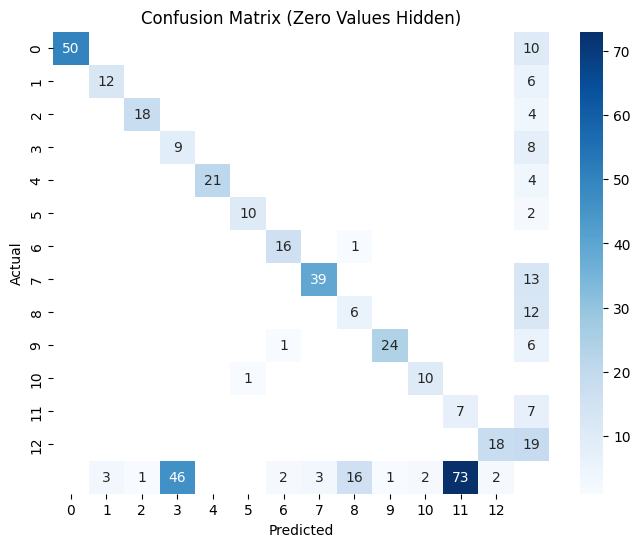

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the confusion matrix
cm = test_results.confusion_matrix.matrix

# Ensure cm is a NumPy array
cm = np.array(cm)

# Create a mask to hide zero values
mask = cm == 0

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=test_results.names,
            yticklabels=test_results.names, mask=mask, linewidths=0, linecolor='gray')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Zero Values Hidden)")
plt.show()


In [16]:
import numpy as np
import pandas as pd

# Extract the confusion matrix
cm = test_results.confusion_matrix.matrix

# Ensure cm is a NumPy array
cm = np.array(cm)

# Compute per-class accuracy
class_accuracy = np.diag(cm) / cm.sum(axis=1)  # True Positives / Total Samples in Class

# Store results in a dictionary
accuracy_results = {
    test_results.names[i]: f"{class_accuracy[i] * 100:.2f}" if not np.isnan(class_accuracy[i]) else "0.00"
    for i in range(len(test_results.names))
}

# Convert to DataFrame for better readability
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Class", "Accuracy (%)"])

# Calculate average accuracy
avg_accuracy = accuracy_df["Accuracy (%)"].astype(float).mean()

# Display accuracy table
print(accuracy_df)
print(f"\n\033[1mAverage Accuracy: {avg_accuracy:.2f}%\033[0m")


               Class Accuracy (%)
0           Aircraft        83.33
1         Camouflage        66.67
2              Drone        81.82
3               Fire        52.94
4            Grenade        84.00
5           Hand-Gun        83.33
6              Knife        94.12
7   Military-Vehicle        75.00
8            Missile        33.33
9             Pistol        77.42
10             Rifle        90.91
11             Smoke        50.00
12           Soldier        48.65

Average Accuracy: 70.89%
